<a href="https://colab.research.google.com/github/annefrancine/ML_2022-2023/blob/main/Kmeans.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cet algorithme a été conçu en 1957 au sein des Laboratoires Bell par Stuart P.Lloyd comme technique de modulation par impulsion et codage(MIC) . Il n’a été présenté au grand publique qu’en 1982. En 1965 Edward W.Forgy avait déjà publié un algorithme quasiment similaire c’est pourquoi le K-means est souvent nommé algorithme de Lloyd-Forgy.
Les champs d’application sont divers : segmentation client, analyse de donnée, segmenter une image, apprentissage semi-supervisé….


La méthode des kmeans repose sur la minimisation de la somme des distances euclidiennes au carré entre chaque objet (ou sujet, ou point) et le centroïde (le point central) de son cluster.

C'est une approche de clustering non-hiérarchique (à l’intérieur d’un cluster les objets ne sont pas ordonnés en fonction de leurs ressemblance)

**## Principe : La distance euclidienne**
La distance euclidienne est à la base de la méthode des kmeans, puisqu’il s’agit d’attribuer un cluster à chaque point, de façon à ce que la somme des distances euclidiennes au carré entre chaque point et le centroide de son cluster, soit la plus faible possible. On parle de minimisation de la variation intra-cluster (within-cluster variation en anglais).

La distance euclidienne est simplement une généralisation du théorème de Pythagore qui dit que ” le carré de la longueur de l’hypoténuse, qui est le côté opposé à l’angle droit, est égal à la somme des carrés des longueurs des deux autres côtés.”

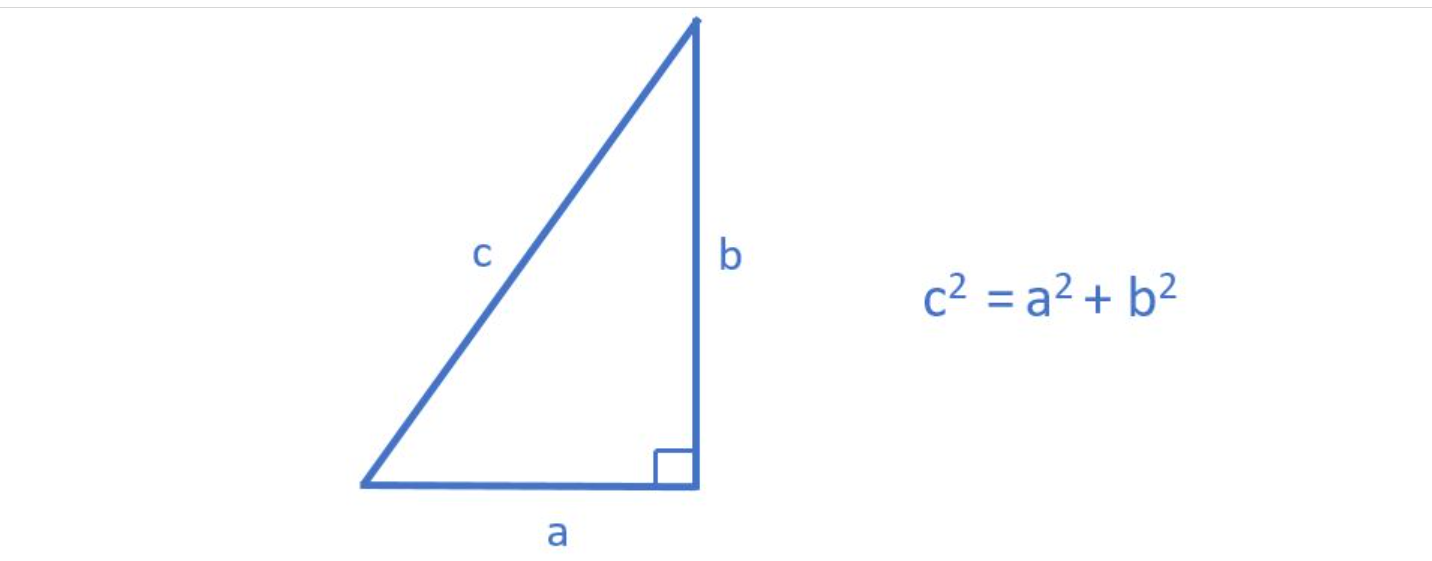

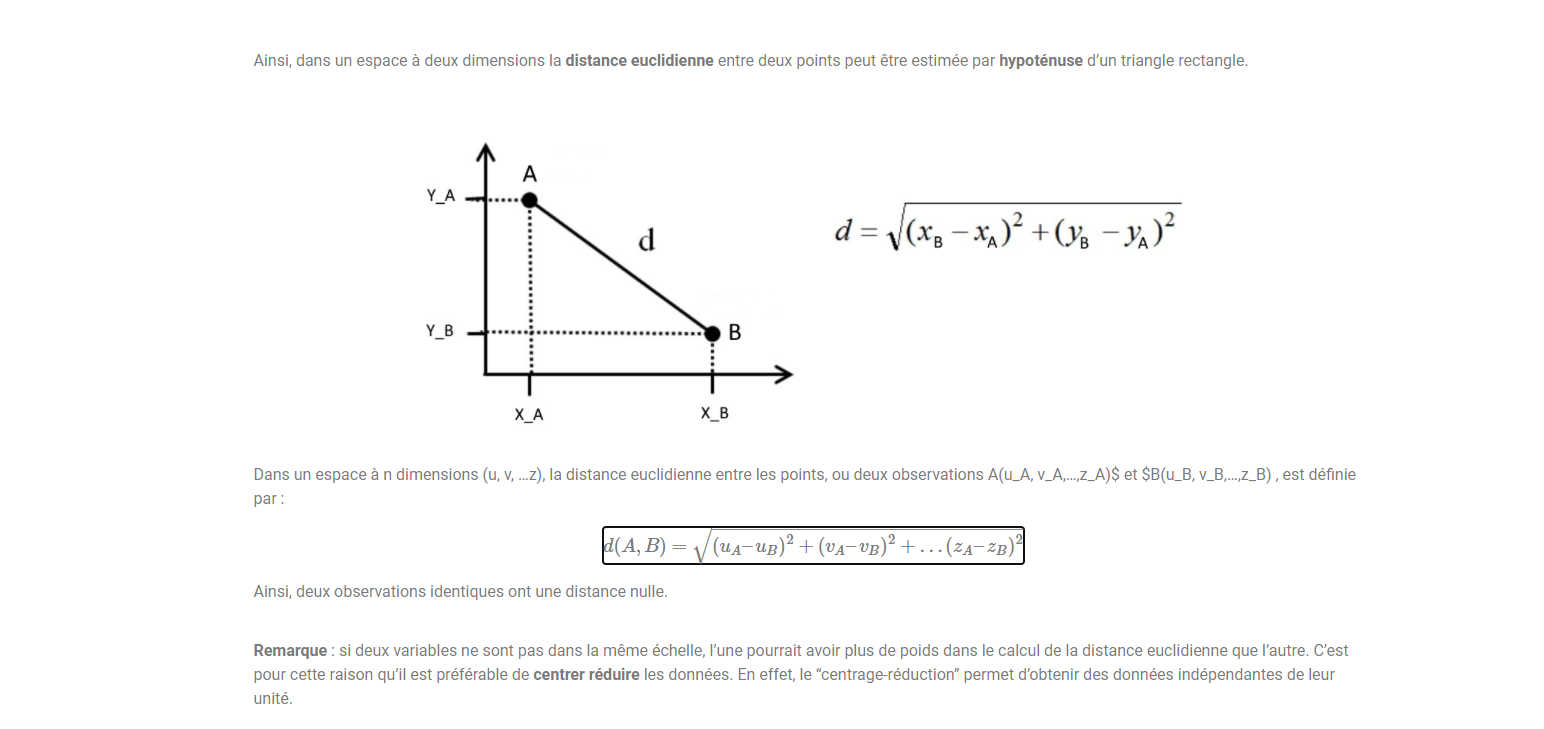

**L'algorithme**

L’algorithme du kmeans est un algorithme itératif qui minimise la somme des distances entre chaque individu et le centroïde du cluster ; c’est la variabilité intra cluster.

Le principe est :

1) Attribuer un cluster à chaque objet (ou sujet, ou point), de façon aléatoire.
2) Calculer le centroïde de chaque cluster (c’est-à-dire le vecteur des moyennes des différentes variables)
3) Pour chaque objet (ou sujet ou point) calculer sa distance euclidienne avec les centroides de chacun des clusters
4) Attribuer à l’objet le cluster le plus proche de lui
5) Calculer la somme de la variabilité intra-cluster
6) Recommencer les étapes 2 à 5, jusqu’à atteindre un équilibre, on parle de convergence : plus aucun changement de clusters, ou stabilisation de la somme de la variabilité intra-cluster.

Voici un exemple de construction de 3 clusters avec 2 variables (2 dimensions) pour bien comprendre.


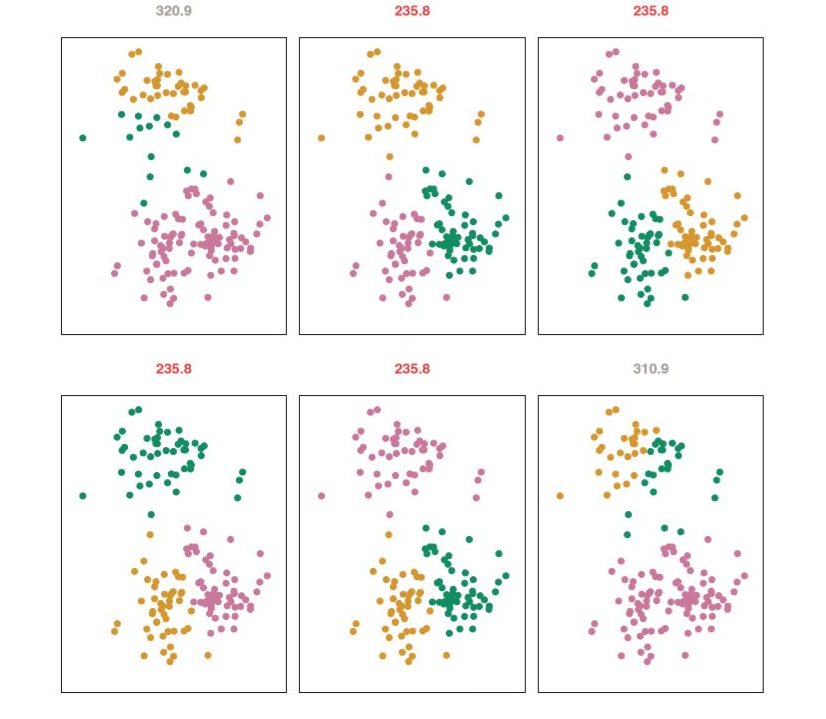

**Choisir K : le nombre de clusters**

Choisir un nombre de cluster K n’est pas forcément intuitif. Spécialement quand le jeu de données est grand et qu’on n’ait pas un a priori ou des hypothèses sur les données. Un nombre K grand peut conduire à un partitionnement trop fragmenté des données. Ce qui empêchera de découvrir des patterns intéressants dans les données. Par contre, un nombre de clusters trop petit, conduira à avoir, potentiellement, des cluster trop généralistes contenant beaucoup de données. Dans ce cas, on n’aura pas de patterns “fins” à découvrir.

Pour un même jeu de données, il n’existe pas un unique clustering possible. La difficulté résidera donc à choisir un nombre de cluster K qui permettra de mettre en lumière des patterns intéressants entre les données. Malheureusement il n’existe pas de procédé automatisé pour trouver le bon nombre de clusters.

## **Quand utiliser le k-means ?**


- Utilisez un k-means pour regrouper rapidement des individus, pour structurer vos données. Ca peut être le cas par exemple dans une analyse descriptive. Vous analysez la rentabilité de vos clients, vous voyez qu’il existe des différences assez importantes entre les clients les plus rentables et les moins rentables ? Dans ce cas un k-means va vous permettre de créer rapidement des groupes de clients en fonction de leur rentabilité et vous y verrez plus clair.

- Utiliser un k-means quand le dataset à segmenter est trop volumineux pour une méthode hiérarchique. Si les données à segmenter sont trop importantes les méthodes hiérarchiques comme la Classification Ascendante Hiérarchique ne peuvent pas être utilisées. Dans ce cas on combine k-means et CAH (ça s’appelle la méthode mixte) pour avoir un bon compromis entre performance et rapidité de calcul.

- Utiliser un k-means pour visualiser rapidement des groupes d’individus. Enfin pour finir, je vous conseille d’utiliser un k-means dans les outils de visualisation lorsque la méthode est disponible pour visualiser rapidement les groupes qui existent.






https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [ ]:
# charger les packages
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
#charger le dataset
dataset= pd.read_csv('https://raw.githubusercontent.com/sametgirgin/Machine-Learning-Clustering-Models/master/Mall_Customers.csv')

In [ ]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [ ]:
# Sélectionnez les colonnes de revenu annuel et de score de dépenses
X=dataset.iloc[:, [3,4]].values

In [ ]:
# Utiliser la méthode elbow pour trouver le nombre optimal de clusters.

from sklearn.cluster import KMeans
wcss=[]
#cette boucle adaptera l'algorithme des k-moyennes à nos données et
#Ensuite, nous calculerons la somme des carrés à l'intérieur deu cluster et l'ajouterons à notre liste wcss.
for i in range(1,11):
     kmeans = KMeans(n_clusters=i, init ='k-means++',max_iter=300,n_init=10,random_state=0 )
#i ci-dessus est compris entre 1 et 10 chiffres. init est la méthode d'initialisation aléatoire.
#nous sélectionnons la méthode kmeans++. max_iter paramètre le nombre maximum d'itérations possibles pour #trouver les clusters finaux lorsque l'algorithme K-meands s'exécute.
#nous entrons la valeur par défaut 300.
#Le paramètre max_iter est le nombre maximum d'itérations possibles pour trouver les clusters finaux lorsque l'algorithme K_means est exécuté. Nous entrons la valeur par défaut de 300.
#Le paramètre suivant est n_init qui est le nombre de fois que l'algorithme K_means sera exécuté avec différents centroïdes initiaux.
#différents centroïdes initiaux.
     kmeans.fit(X)
#L'algorithme des kmeans s'adapte à l'ensemble de données X
     wcss.append(kmeans.inertia_)
# kmeans inertia_ attribute est : Somme des distances au carré des échantillons par rapport à leur centre de cluster le plus proche.

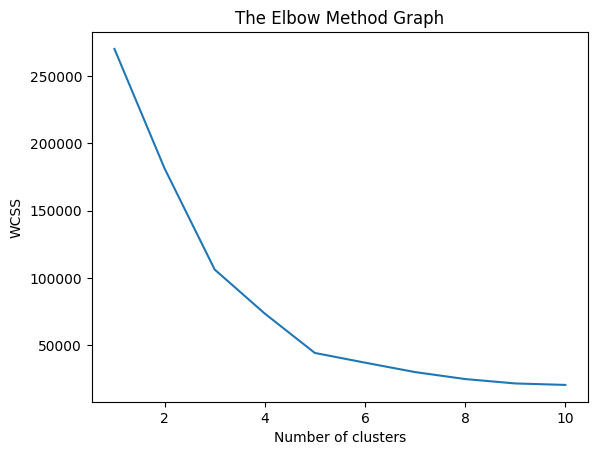

In [ ]:
#Plot  elbow
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method Graph')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [ ]:
# Selon le graphique Elbow, nous déterminons le nombre de clusters comme 5

kmeans = KMeans(n_clusters=5, init ='k-means++',max_iter=300,n_init=10,random_state=0 )
y_kmeans = kmeans.fit_predict(X)

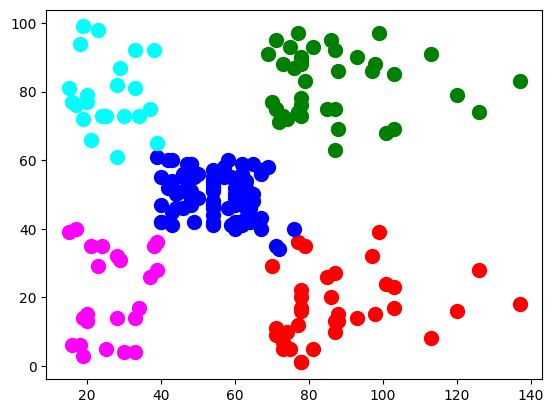

In [ ]:
# Visualiser les clusters
plt.scatter(X[y_kmeans==0, 0], X[y_kmeans==0, 1], s=100, c='red', label ='Cluster 1')
plt.scatter(X[y_kmeans==1, 0], X[y_kmeans==1, 1], s=100, c='blue', label ='Cluster 2')
plt.scatter(X[y_kmeans==2, 0], X[y_kmeans==2, 1], s=100, c='green', label ='Cluster 3')
plt.scatter(X[y_kmeans==3, 0], X[y_kmeans==3, 1], s=100, c='cyan', label ='Cluster 4')
plt.scatter(X[y_kmeans==4, 0], X[y_kmeans==4, 1], s=100, c='magenta', label ='Cluster 5');

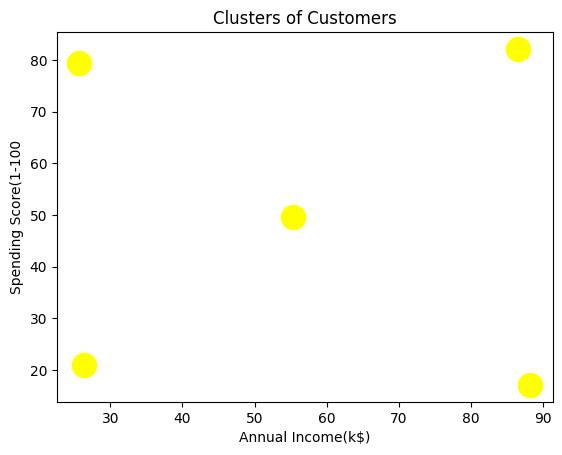

In [ ]:
# Tracez le centroïde. Cette fois, nous allons utiliser l'attribut cluster centers qui
#renvoie ici les coordonnées du centroïde.

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='yellow', label ='Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income(k$)')
plt.ylabel('Spending Score(1-100')
plt.show()